# Final Project

Welcome to the final practical project for our course on [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023). Throughout this project, you will go through the entire data science process, starting from data loading and cleaning, all the way to running a model and making predictions. This hands-on project will provide you with valuable experience and allow you to apply the concepts and techniques you've learned in the course. Get ready to dive into real-world data analysis and build your skills as a data scientist!


## Important Remarks:

 - The ultimate goal of this project is to conduct comprehensive data analysis and build 2 models using the provided datasets.
 - Code is not the only thing graded here. Well-written and understandable documentation of your code is to be expected
 - Clear reasoning behind your choices in every step of the notebook is important. Be it the choice of a data cleaning technique or selecting certain features in your analysis or the choice of your 2 models.

# Importing packages


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,f1_score,recall_score

# Load the dataset into data


In [60]:
# To keep the original dataset, it will be saved in a variable called "raw_titanic"

raw_titanic = pd.read_csv("titanic.csv")

# Dataset overview and statistical summary


In [61]:
#the functions '.head()' '.info()' '.describe()' and '.isnull()' are used to provide a general overview

In [62]:
raw_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
raw_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass       1000 non-null   int64  
 3   Name         1000 non-null   object 
 4   Sex          1000 non-null   object 
 5   Age          823 non-null    float64
 6   SibSp        1000 non-null   int64  
 7   Parch        1000 non-null   int64  
 8   Ticket       1000 non-null   object 
 9   Fare         1000 non-null   float64
 10  Cabin        299 non-null    object 
 11  Embarked     998 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [64]:
raw_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,823.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,30.177606,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,15.138305,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,29.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,39.500000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
raw_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          701
Embarked         2
dtype: int64

# Data cleaning

In [66]:
# We will need to perform data cleaning particularly for the 'Age', 'Cabin' and 'Embarked' columns (due to missing data)

In [67]:
# Most of the values in the "Cabin" column are NaN, for this reason Deletion was employed (the whole column was deleted)

titanic=raw_titanic.drop(columns='Cabin')

In [68]:
# Because "Embarked" is composed of categorical values, the mode is chosen to perform Imputation in the missing values

titanic['Embarked']=titanic['Embarked'].fillna(value=titanic['Embarked'].mode()[0])

In [69]:
#For the Age, Let's take a look at the data statistics

titanic['Age'].describe()

count    823.000000
mean      30.177606
std       15.138305
min        0.420000
25%       21.000000
50%       29.000000
75%       39.500000
max       80.000000
Name: Age, dtype: float64

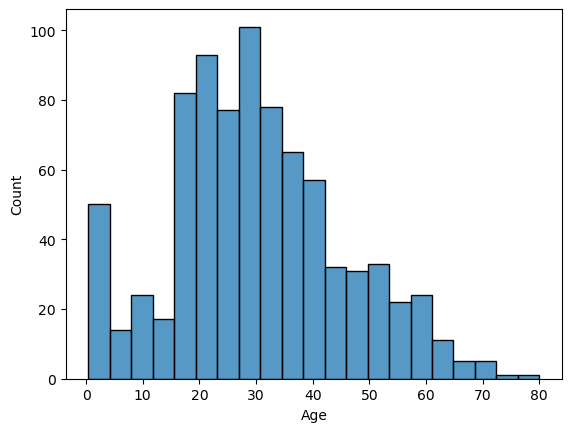

In [70]:
# Now let's vizualize how the data looks like

sns.histplot(titanic['Age'])
plt.show()

In [71]:
#For the age, both the mean and median give values quite close to one another (30 and 29)
# As such, we will simply use the median (29) to replace the NaN

titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [72]:
#Some of the values in the Age category were not integers. Since in the real world we define our Age by integers, I chose to round them 

titanic['Age']=round(titanic['Age'],0)
titanic['Age'].unique()

array([22., 38., 26., 35., 29., 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 30., 33.,
       23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51., 56.,
       44., 61., 50., 62., 41., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80.,  6.,  0., 74.])

# EDA

In [73]:
#checking our current data set

titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass       1000 non-null   int64  
 3   Name         1000 non-null   object 
 4   Sex          1000 non-null   object 
 5   Age          1000 non-null   float64
 6   SibSp        1000 non-null   int64  
 7   Parch        1000 non-null   int64  
 8   Ticket       1000 non-null   object 
 9   Fare         1000 non-null   float64
 10  Embarked     1000 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,29.965000,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,13.737849,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,29.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,36.000000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


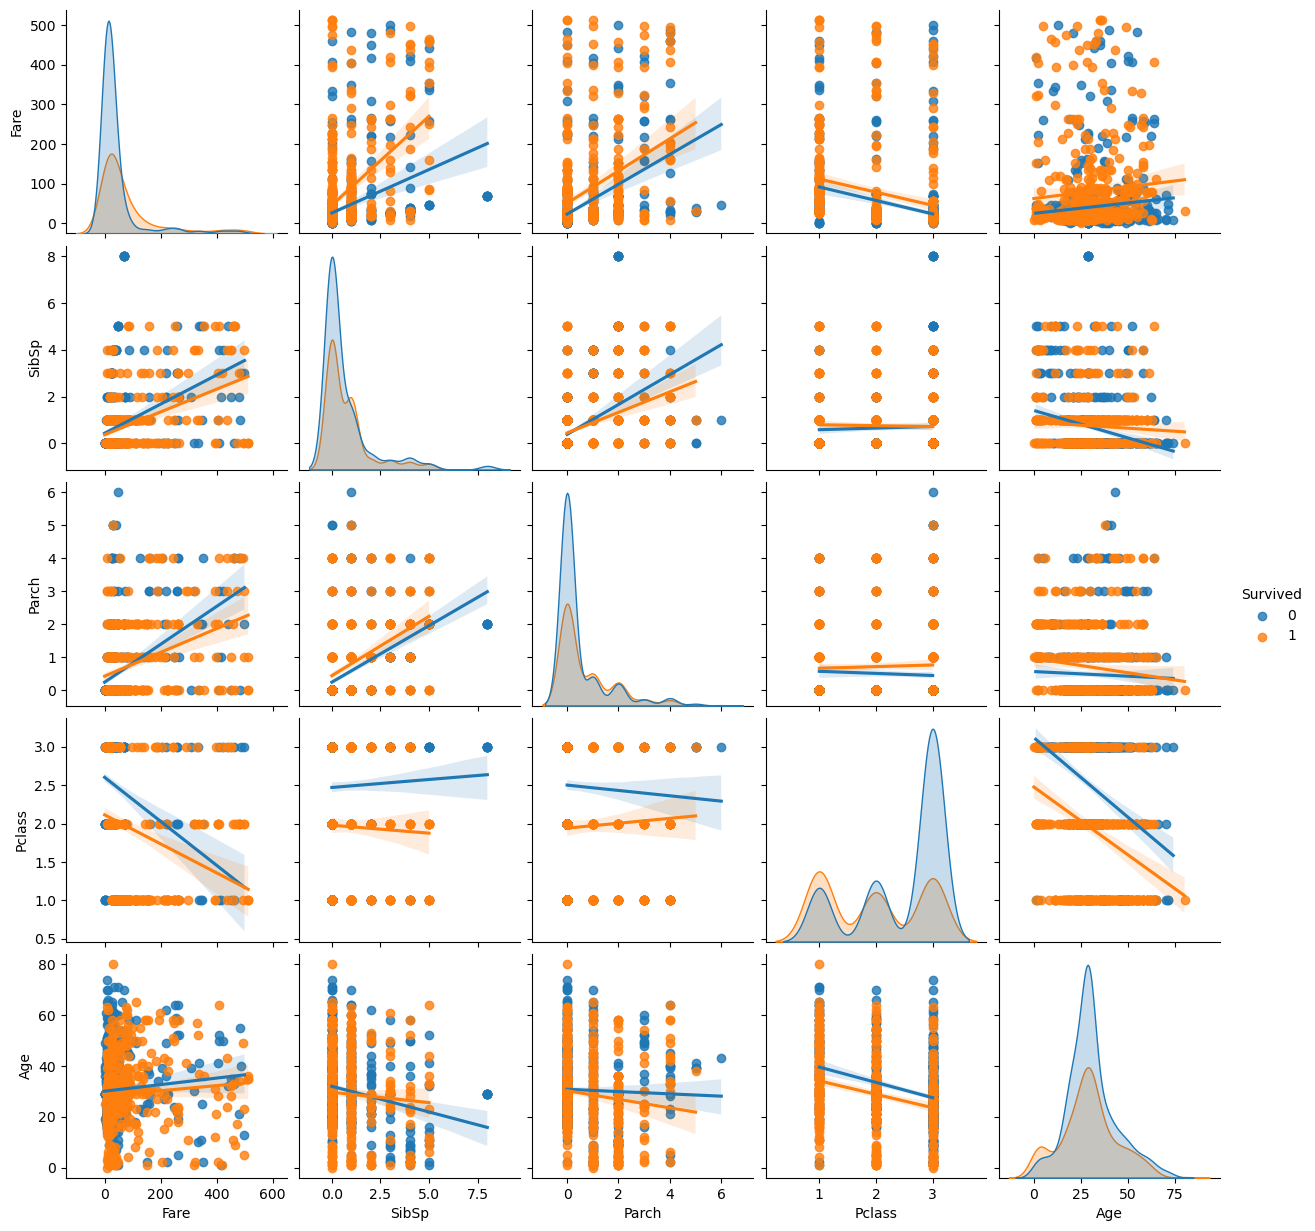

In [74]:
#Let's see how the numerical variables relate to each other and how they differ on the passers that survived Vs deceased

sns.pairplot(titanic,vars=['Fare','SibSp','Parch','Pclass','Age'],hue='Survived',kind='reg')
plt.show()

In [75]:
#Create tables only with passagers that survived and that died

survived=titanic[titanic['Survived']==1]
died=titanic[titanic['Survived']==0]

In [76]:
#Overal survival rate

len(survived)/len(titanic)*100

40.400000000000006

In [77]:
#Survival Rate for Females
sr_females=len(survived[survived['Sex']=='female'])/len(titanic[titanic['Sex']=='female'])*100
print(sr_females)

#Survival Rate for Males
sr_males=len(survived[survived['Sex']=='male'])/len(titanic[titanic['Sex']=='male'])*100
print(sr_males)

71.73913043478261
22.151898734177212


In [78]:
#Total Number of Females on titanict
females=len(titanic[titanic['Sex']=='female'])
print(females)

#Total Number of Males on titanict
males=len(titanic[titanic['Sex']=='male'])
print(males)


#Total Number of Females that survived
surv_females=len(survived[survived['Sex']=='female'])
print(surv_females)

#Total Number of Males that survived
surv_males=len(survived[survived['Sex']=='male'])
print(surv_males)

368
632
264
140


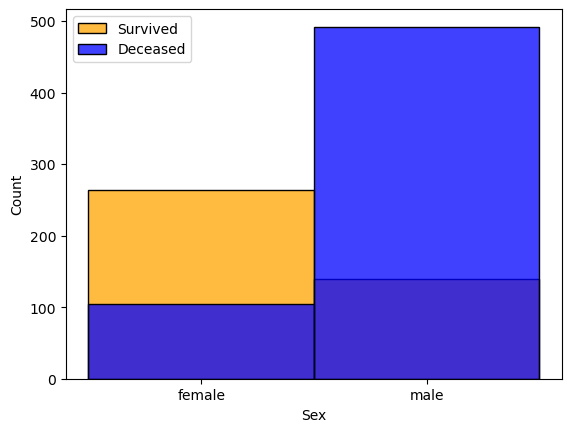

In [79]:
#Sex distribution Visualization

sns.histplot(survived['Sex'],color='orange',label='Survived')
sns.histplot(died['Sex'],color='blue',label='Deceased')

plt.legend(prop={'size': 10})
plt.show()

In [135]:
#let's turn the variable 'Sex' from categorical to binary, so we can use it for models and for our heatmap

le = LabelEncoder()

titanic['Sex']=le.fit_transform(titanic['Sex'])
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,0.632000,29.965000,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,0.482503,13.737849,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


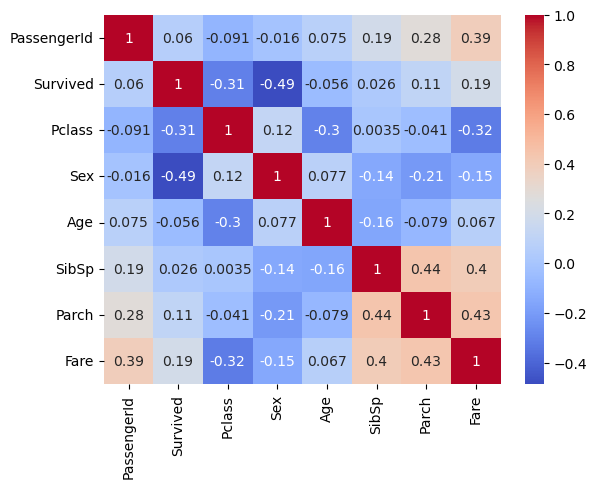

In [136]:
#correlation between 'Titanic' variables

correlation=titanic.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# Data Processing and normalization

In [45]:
scaler = StandardScaler()

# Creating ML model 1

In [67]:
#We will first use Logistic Regression, since we want to predict a target variable which is categorical 'Survived'

In [128]:
#inputs and outputs

X = titanic[['Pclass','Sex','Age','Parch']]
y = titanic['Survived']


#explanation for why these features were used as input in the last section (Report)

In [129]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [130]:
# Create an instance of the logistic regression model
logistic_regression = LogisticRegression()

# Fit the model on the training data
model=logistic_regression.fit(X_train, y_train)

## Prediction on Test data

In [131]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

## Model 1 Performance

In [132]:
#How well did the model do in training?

train_score = round(model.score(X_train, y_train),3)*100
print("Training Score:", train_score)

Training Score: 76.5


In [137]:
#How well did the model do in testing?

test_score = round(model.score(X_test, y_test),3)*100
print("Testing Score:", test_score)

Testing Score: 76.8


In [134]:
#How well does the model predict the unseen data?

accuracy = round(accuracy_score(y_test, y_pred),3)*100
print("Accuracy:", accuracy)

Accuracy: 76.8


# Creating ML model 2

In [76]:
#Since this is a lower dimensionality dataset, we will employ KNN here as the second model

In [139]:
#inputs and outputs

X = titanic[['Pclass','Sex','Age','Parch']]
y = titanic['Survived']



In [140]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#Input normalization
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# Create an instance of the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=3)  # Specify the number of neighbors (k)

# Train the KNN model
knn=classifier.fit(X_train, y_train)



## Prediction on Test data

In [141]:
#prediction
y_pred = classifier.predict(X_test)

C:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## ## Model 2 Performance

In [142]:
#How well did the model do in training?

train_score = round(knn.score(X_train, y_train),3)*100
print("Training Score:", train_score)

Training Score: 85.5


C:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [143]:
#How well did the model do in testing?

test_score = round(knn.score(X_test, y_test),3)*100
print("Testing Score:", test_score)

Testing Score: 71.6


C:\ana\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [144]:
#How well does the model predict the unseen data?

accuracy = round(accuracy_score(y_test, y_pred),3)*100
print("Accuracy:", accuracy)

Accuracy: 71.6


# Report and insight from your analysis

### Data Overview and Cleaning

First, an overview of the dataset was made using the functions $\textbf{.head()}$, $\textbf{.info()}$, $\textbf{.describe()}$ and $\textbf{.isnull()}$.It was observed three categories that needed to be taken into account for data cleaning: $\textit{Age}$ , $\textit{Cabin}$ and $\textit{Embarked}$. 



For $\textit{Cabin}$, due to the high number of $\textbf{NaN}$, deletion was chosen. 

For $\textit{Embarked}$, being a categorical variable, it was chosen to perform imputation using the $\underline{Mode}$. 

The $\textit{Age}$ is a bit trickier because it is a numerical variable, and there is still a considerable number of $\textbf{NaN}$ present in the dataset.  With the aid of data visualization (histogram in this case) and of the central tendency measures, and given what was learned in the course, I thought the best course of action would be to use imputation with the $\underline{Median}$. The $\underline{Mean}$ would produce a similar effect in this case, since both measures are similar (about 30). Furthermore, because the $\textit{Age}$ is usually taken in years, the values of this feature were rounded to integers.


### EDA Insights 1 (sns.pairplot)

The first EDA step was to do a $\textbf{sns.pairlpot}$ and visualize the tendencies and between the numerical relevant variables. Some insights: 

Regarding the number of siblings/spouses ($\textit{SibSp}$), or the number of parents/children ($\textit{Parch}$), most people seem to have none or only 1. There is no apparent link between these and the survival rates, as the diagonal curves for these variables for $\textit{Survived}$=1 and $\textit{Survived}$=0.

Regarding the class ($\textit{Pclass}$) and fare ($\textit{Fare}$), it is observed, as expected, that a higher class, such as 1st class requires a higher fare. It can also be observed from the $\textbf{sns.pairlpot}$ diagonal referring to $\textit{Pclass}$, that actually the ratio survived/not survived is higher in the 1st class and decreases as the class decreases. For instance, most people in 1st class actually survived (orange line above blue one), while the number of deceased increases when we go to 2nd class, and even more so when we jump to the 3rd one. This may indicate that being in a higher class could mean a higher survival change. Indeed this seems to be the highest correlated variable with $\textit{Survived}$ (looking at the heatmap).

Regarding the $\textit{Age}$, no strong correlation appears to exist with $\textit{Survived}$. Nonetheless, the diagonal $\textbf{sns.pairlpot}$ shows that more young kids appear to have a higher survival rate than any other age, which makes sense as families would probably prioritize saving their children over themselves.


### EDA Insights 2 (Survival Rates, Gender and sns.heatmap)

Overall, more people were deceased than survived, with a survival rate of only 40.4%. 

Since $\textit{Sex}$ is a categorical variable, a side analysis was done for this variable. A histogram was plotted for visualization, and survival rations were calculated. One observes a much higher survival rate for women (71.74%) than for men (22.15%). In fact, despite the total number of men aboard titanic being nearly double the women (632 and 368, respectively), the number of women that survived is nearly the twice the number of men that survived (264 and 140, respectively). All this is indication that gender may in fact play a role in the survival changes of a passenger. 

Using Label Encoder, the $\textit{Sex}$ variable was converted to binary, and a heatmap was plotted. It showed stronger correlations between $\textit{Parch}$, $\textit{Fare}$ and $\textit{SibSp}$, which makes sense since the fare should increase with higher number of family members. In the same way, it is more likely that if one brings children or parents on board, it would also bring their spouse/rest of the family and vice versa.

### ML Model 1

To employ our machine learning models, it would be of our interest to predict whether a passenger survived or not based on the remaining features. The first model was Logistic regression, since we are predicting a target value with categorical outcomes. 

The model was prepared with a test_size=0.25, and scores/accuracy scores of the trained, tested and predicted data were evaluated. $\textit{Pclass}$ and $\textit{Sex}$ were chosen as the first input features, as they would seem to play key factors in survival rate and hold the strongest correlations with $\textit{Survived}$ from the heatmap. Accuracy scores of 75.7%, 75.2% and 75.2% were obtained for training, testing and predicting scores, respectively. 

Other variables were added and tested as inputs to test the scores. Despite no strong correlation observed in EDA, it would be expected that $\textit{Age}$ would play an important factor in survival rates. Indeed, when adding it as input, the scores increased to 76.3%, 76.4% and 76.4% (training, testing and predicting, respectively). The remaining features were also added and tested, and the scores increased slightly when the $\textit{Parch}$ variable was added. Newer scores: 76.5%, 76.8% and 76.8% (training, testing and predicting, respectively). 

As such, these four features were kept and provide the highest scores for our model. The scores all seem relatively close, and therefore are an indication of consistent performance of the model.

### ML Model 2

For the logistic regression, it was not necessary to perform standardization in this case, as the scores did not change significantly. However, for the next model the KNN method was chosen, and normalization was necessary as this is a distance-based approach, making features with larger scales dominate the results, if not properly scaled. 

The selected input features were the same, and the value of k was set to 3, because, after a few tests, the scores were maximized in these conditions. Once again, good scores were obtained: 85.5% for training and 71.6% for testing and predicting. The drop in score from training to the remaining scores is natural since there is always some novelty to the unseen data when compared to the training data. 

One final remark is that the “predicting the test data” and “model performance” jupyter cells return an error when run. I have googled but found no way to fix them. Nonetheless, during my google research I did see this error was harmless for the calculation of the performances.